Welcome to my notebook on UFC athletes. The main goal of this is to cluster the athletes into groups depending upon their offensive stats. 

#**Data Exploration**

## Read in the data

In [1847]:
import pandas as pd
import numpy as np

In [1848]:
df = pd.read_csv('FightTotals.csv')

In [1849]:
df.shape

(32028, 33)

The dataset is a fighters stats in a round by round format for a given bout. 

In [1850]:
df.head()

,Event,Bout,Weightclass,TitleFight,Round,Fighter,KD,SIG_STR_LAND,SIG_STR_ATT,TOTAL_STR_LAND,...,STD_STR_ATT,CLINCH_STR_LAND,CLINCH_STR_ATT,GRD_STR_LAND,GRD_STR_ATT,WINNER,WIN_BY,LAST_ROUND,Round_Time(sec),FORMAT
0,UFC 2: No Way Out,Royce Gracie vs. Patrick Smith,Open Weight Bout,Yes,Round 1,Royce Gracie,0,4,4,11,...,0,1,1,3,3,Royce Gracie,KO/TKO,1,77,1
1,UFC 2: No Way Out,Royce Gracie vs. Patrick Smith,Open Weight Bout,Yes,Round 1,Patrick Smith,0,1,2,2,...,1,1,1,0,0,Royce Gracie,KO/TKO,1,77,1
2,UFC 2: No Way Out,Royce Gracie vs. Remco Pardoel,Open Weight Bout,No,Round 1,Royce Gracie,0,0,0,0,...,0,0,0,0,0,Royce Gracie,Submission,1,91,1
3,UFC 2: No Way Out,Royce Gracie vs. Remco Pardoel,Open Weight Bout,No,Round 1,Remco Pardoel,0,0,0,0,...,0,0,0,0,0,Royce Gracie,Submission,1,91,1
4,UFC 2: No Way Out,Patrick Smith vs. Johnny Rhodes,Open Weight Bout,No,Round 1,Patrick Smith,0,5,12,5,...,10,2,2,0,0,Patrick Smith,Submission,1,67,1


## Check out what the data is like


In [1851]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32028 entries, 0 to 32027
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Event            32028 non-null  object 
 1   Bout             32028 non-null  object 
 2   Weightclass      32028 non-null  object 
 3   TitleFight       32028 non-null  object 
 4   Round            32028 non-null  object 
 5   Fighter          32028 non-null  object 
 6   KD               32028 non-null  int64  
 7   SIG_STR_LAND     32028 non-null  int64  
 8   SIG_STR_ATT      32028 non-null  int64  
 9   TOTAL_STR_LAND   32028 non-null  int64  
 10  TOTAL_STR_ATT    32028 non-null  int64  
 11  TD               32028 non-null  int64  
 12  TD_ATT           32028 non-null  int64  
 13  SubAtt           32028 non-null  int64  
 14  Reversal         32028 non-null  int64  
 15  CTRL_TIME(sec)   31596 non-null  float64
 16  HEAD_LAND        32028 non-null  int64  
 17  HEAD_ATT    

Seems that there are some null values

In [1852]:
df.isna().sum()

Event                0
Bout                 0
Weightclass          0
TitleFight           0
Round                0
Fighter              0
KD                   0
SIG_STR_LAND         0
SIG_STR_ATT          0
TOTAL_STR_LAND       0
TOTAL_STR_ATT        0
TD                   0
TD_ATT               0
SubAtt               0
Reversal             0
CTRL_TIME(sec)     432
HEAD_LAND            0
HEAD_ATT             0
BODY_LAND            0
BODY_ATT             0
LEG_LAND             0
LEG_ATT              0
STD_STR_LAND         0
STD_STR_ATT          0
CLINCH_STR_LAND      0
CLINCH_STR_ATT       0
GRD_STR_LAND         0
GRD_STR_ATT          0
WINNER               0
WIN_BY               0
LAST_ROUND           0
Round_Time(sec)      0
FORMAT               0
dtype: int64

In [1853]:
df['CTRL_TIME(sec)'] = df['CTRL_TIME(sec)'].fillna(0)

df['Round'] = df['Round'].apply(lambda x: int(x.split(' ')[1]))

Viewing the descriptive statistics. I had to break it up into a couple sections since there are to many columns to view at once.

In [1854]:
df.loc[:, "KD":"HEAD_ATT"].describe()

,KD,SIG_STR_LAND,SIG_STR_ATT,TOTAL_STR_LAND,TOTAL_STR_ATT,TD,TD_ATT,SubAtt,Reversal,CTRL_TIME(sec),HEAD_LAND,HEAD_ATT
count,32028.000000,32028.000000,32028.000000,32028.000000,32028.000000,32028.000000,32028.000000,32028.000000,32028.000000,32028.000000,32028.000000,32028.000000
mean,0.092544,15.045398,34.187430,22.791151,42.956288,0.455882,1.201542,0.171038,0.058262,56.413857,9.523448,26.685681
std,0.321855,11.583212,24.219667,16.362460,25.935926,0.791986,1.596160,0.496877,0.247338,74.214952,8.858087,20.566033
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,6.000000,16.000000,11.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,11.000000
50%,0.000000,13.000000,30.000000,20.000000,40.000000,0.000000,1.000000,0.000000,0.000000,20.000000,7.000000,22.000000
75%,0.000000,21.000000,48.000000,31.000000,58.000000,1.000000,2.000000,0.000000,0.000000,90.000000,13.000000,37.000000
max,4.000000,141.000000,220.000000,344.000000,351.000000,9.000000,12.000000,8.000000,4.000000,300.000000,120.000000,213.000000


In [1855]:
df.loc[:, "BODY_LAND":"FORMAT"].describe()

,BODY_LAND,BODY_ATT,LEG_LAND,LEG_ATT,STD_STR_LAND,STD_STR_ATT,CLINCH_STR_LAND,CLINCH_STR_ATT,GRD_STR_LAND,GRD_STR_ATT,LAST_ROUND,Round_Time(sec),FORMAT
count,32028.000000,32028.000000,32028.000000,32028.000000,32028.000000,32028.000000,32028.000000,32028.000000,32028.000000,32028.000000,32028.000000,32028.000000,32028.000000
mean,3.073998,4.452666,2.447952,3.049082,10.717372,27.889815,2.174316,3.148183,2.153709,3.149432,2.773198,267.722305,3.213251
std,3.449662,4.583142,3.196738,3.869805,10.412118,23.872130,3.585991,4.849567,4.822999,6.934246,0.951185,72.165267,0.701521
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,1.000000
25%,1.000000,1.000000,0.000000,0.000000,3.000000,9.000000,0.000000,0.000000,0.000000,0.000000,2.000000,300.000000,3.000000
50%,2.000000,3.000000,1.000000,2.000000,8.000000,22.000000,1.000000,1.000000,0.000000,0.000000,3.000000,300.000000,3.000000
75%,4.000000,6.000000,4.000000,4.000000,16.000000,41.000000,3.000000,4.000000,2.000000,3.000000,3.000000,300.000000,3.000000
max,49.000000,52.000000,38.000000,43.000000,139.000000,218.000000,45.000000,61.000000,92.000000,104.000000,5.000000,596.000000,5.000000


## Change the data types so that it takes up less space

In [1856]:
df = df.astype({'TitleFight':'category', 'Round':'int8','KD': 'int8', 'SIG_STR_LAND': 'int16', 'SIG_STR_ATT':'int16', 'TOTAL_STR_LAND':'int16',
                'TOTAL_STR_ATT':'int16', 'TD':'int8', 'TD_ATT':'int8', 'SubAtt':'int8', 'Reversal':'int8',
                'CTRL_TIME(sec)':'int16', 'HEAD_LAND':'int16', 'HEAD_ATT':'int16', 'BODY_LAND':'int16',
                'BODY_ATT':'int16', 'LEG_LAND':'int16', 'LEG_ATT':'int16', 'STD_STR_LAND':'int16', 'STD_STR_ATT':'int16',
                'CLINCH_STR_LAND':'int16', 'CLINCH_STR_ATT':'int16', 'GRD_STR_LAND':'int16', 'GRD_STR_ATT':'int16',
                'WIN_BY':'category', 'Round_Time(sec)':'int16', 'LAST_ROUND':'int8', 'FORMAT':'int8'})

We go from 8.1mb to 2.6mb

In [1857]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32028 entries, 0 to 32027
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Event            32028 non-null  object  
 1   Bout             32028 non-null  object  
 2   Weightclass      32028 non-null  object  
 3   TitleFight       32028 non-null  category
 4   Round            32028 non-null  int8    
 5   Fighter          32028 non-null  object  
 6   KD               32028 non-null  int8    
 7   SIG_STR_LAND     32028 non-null  int16   
 8   SIG_STR_ATT      32028 non-null  int16   
 9   TOTAL_STR_LAND   32028 non-null  int16   
 10  TOTAL_STR_ATT    32028 non-null  int16   
 11  TD               32028 non-null  int8    
 12  TD_ATT           32028 non-null  int8    
 13  SubAtt           32028 non-null  int8    
 14  Reversal         32028 non-null  int8    
 15  CTRL_TIME(sec)   32028 non-null  int16   
 16  HEAD_LAND        32028 non-null  int16  

#**Data Transformation**

## Create a new dataframe with just the fighter and all the numeric columns

In [1858]:
df.describe().columns # numeric columns

Index(['Round', 'KD', 'SIG_STR_LAND', 'SIG_STR_ATT', 'TOTAL_STR_LAND',
       'TOTAL_STR_ATT', 'TD', 'TD_ATT', 'SubAtt', 'Reversal', 'CTRL_TIME(sec)',
       'HEAD_LAND', 'HEAD_ATT', 'BODY_LAND', 'BODY_ATT', 'LEG_LAND', 'LEG_ATT',
       'STD_STR_LAND', 'STD_STR_ATT', 'CLINCH_STR_LAND', 'CLINCH_STR_ATT',
       'GRD_STR_LAND', 'GRD_STR_ATT', 'LAST_ROUND', 'Round_Time(sec)',
       'FORMAT'],
      dtype='object')

In [1859]:
numericDF = df[['Fighter', 'KD', 'SIG_STR_LAND', 'SIG_STR_ATT', 'TOTAL_STR_LAND',
       'TOTAL_STR_ATT', 'TD', 'TD_ATT', 'SubAtt', 'Reversal', 'CTRL_TIME(sec)',
       'HEAD_LAND', 'HEAD_ATT', 'BODY_LAND', 'BODY_ATT', 'LEG_LAND', 'LEG_ATT',
       'STD_STR_LAND', 'STD_STR_ATT', 'CLINCH_STR_LAND', 'CLINCH_STR_ATT',
       'GRD_STR_LAND', 'GRD_STR_ATT', 'Round_Time(sec)']]

numericDF.head()

,Fighter,KD,SIG_STR_LAND,SIG_STR_ATT,TOTAL_STR_LAND,TOTAL_STR_ATT,TD,TD_ATT,SubAtt,Reversal,...,BODY_ATT,LEG_LAND,LEG_ATT,STD_STR_LAND,STD_STR_ATT,CLINCH_STR_LAND,CLINCH_STR_ATT,GRD_STR_LAND,GRD_STR_ATT,Round_Time(sec)
0,Royce Gracie,0,4,4,11,11,1,2,0,0,...,0,1,1,0,0,1,1,3,3,77
1,Patrick Smith,0,1,2,2,3,0,0,0,0,...,2,0,0,0,1,1,1,0,0,77
2,Royce Gracie,0,0,0,0,0,1,2,1,0,...,0,0,0,0,0,0,0,0,0,91
3,Remco Pardoel,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,91
4,Patrick Smith,0,5,12,5,12,0,0,1,0,...,2,2,6,3,10,2,2,0,0,67


## Total up the stats for every fighter

In [1860]:
totals_groupedby_fighter = numericDF.groupby('Fighter').sum()
totals_groupedby_fighter.head()

,KD,SIG_STR_LAND,SIG_STR_ATT,TOTAL_STR_LAND,TOTAL_STR_ATT,TD,TD_ATT,SubAtt,Reversal,CTRL_TIME(sec),...,BODY_ATT,LEG_LAND,LEG_ATT,STD_STR_LAND,STD_STR_ATT,CLINCH_STR_LAND,CLINCH_STR_ATT,GRD_STR_LAND,GRD_STR_ATT,Round_Time(sec)
Fighter,,,,,,,,,,,,,,,,,,,,,
AJ Dobson,0.0,110,251,132,278,3.0,3.0,0.0,0.0,76,...,20,16,16,94,227,13,21,3,3,1800
AJ Fletcher,0.0,121,245,190,325,4.0,10.0,2.0,2.0,378,...,17,15,16,110,227,6,10,5,8,1800
Aalon Cruz,0.0,2,15,2,15,0.0,3.0,0.0,0.0,16,...,5,0,4,2,15,0,0,0,0,185
Aaron Brink,0.0,0,5,0,5,0.0,1.0,0.0,0.0,4,...,0,0,0,0,3,0,2,0,0,55
Aaron Phillips,0.0,62,109,346,432,0.0,1.0,1.0,1.0,73,...,32,4,6,28,65,21,25,13,19,2249


Reset the index from being a Fighter to a list of numbers starting at zero

In [1861]:
fighter_totals = totals_groupedby_fighter.reset_index()
fighter_totals.head()

,Fighter,KD,SIG_STR_LAND,SIG_STR_ATT,TOTAL_STR_LAND,TOTAL_STR_ATT,TD,TD_ATT,SubAtt,Reversal,...,BODY_ATT,LEG_LAND,LEG_ATT,STD_STR_LAND,STD_STR_ATT,CLINCH_STR_LAND,CLINCH_STR_ATT,GRD_STR_LAND,GRD_STR_ATT,Round_Time(sec)
0,AJ Dobson,0.0,110,251,132,278,3.0,3.0,0.0,0.0,...,20,16,16,94,227,13,21,3,3,1800
1,AJ Fletcher,0.0,121,245,190,325,4.0,10.0,2.0,2.0,...,17,15,16,110,227,6,10,5,8,1800
2,Aalon Cruz,0.0,2,15,2,15,0.0,3.0,0.0,0.0,...,5,0,4,2,15,0,0,0,0,185
3,Aaron Brink,0.0,0,5,0,5,0.0,1.0,0.0,0.0,...,0,0,0,0,3,0,2,0,0,55
4,Aaron Phillips,0.0,62,109,346,432,0.0,1.0,1.0,1.0,...,32,4,6,28,65,21,25,13,19,2249


## Get the data to be in per minute scale


The purpose for this is becuase some fighters have fought 20 times in the UFC whereas some have only fought once. So by going to a per minute basis, it "standardizes' the stats.

In [1862]:
fighter_totals['Round_Time(sec)'] = fighter_totals['Round_Time(sec)'] / 60

for c in fighter_totals.loc[:, 'KD':'GRD_STR_ATT'].columns:
    fighter_totals[c] = fighter_totals[c] / fighter_totals['Round_Time(sec)']

fighter_totals.rename(columns = {'Round_Time(sec)':'Fight_Time(min)'}, inplace=True)

In [1863]:
fighter_totals.head()

,Fighter,KD,SIG_STR_LAND,SIG_STR_ATT,TOTAL_STR_LAND,TOTAL_STR_ATT,TD,TD_ATT,SubAtt,Reversal,...,BODY_ATT,LEG_LAND,LEG_ATT,STD_STR_LAND,STD_STR_ATT,CLINCH_STR_LAND,CLINCH_STR_ATT,GRD_STR_LAND,GRD_STR_ATT,Fight_Time(min)
0,AJ Dobson,0.0,3.666667,8.366667,4.400000,9.266667,0.100000,0.100000,0.000000,0.000000,...,0.666667,0.533333,0.533333,3.133333,7.566667,0.433333,0.700000,0.100000,0.100000,30.000000
1,AJ Fletcher,0.0,4.033333,8.166667,6.333333,10.833333,0.133333,0.333333,0.066667,0.066667,...,0.566667,0.500000,0.533333,3.666667,7.566667,0.200000,0.333333,0.166667,0.266667,30.000000
2,Aalon Cruz,0.0,0.648649,4.864865,0.648649,4.864865,0.000000,0.972973,0.000000,0.000000,...,1.621622,0.000000,1.297297,0.648649,4.864865,0.000000,0.000000,0.000000,0.000000,3.083333
3,Aaron Brink,0.0,0.000000,5.454545,0.000000,5.454545,0.000000,1.090909,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.272727,0.000000,2.181818,0.000000,0.000000,0.916667
4,Aaron Phillips,0.0,1.654068,2.907959,9.230769,11.525122,0.000000,0.026679,0.026679,0.026679,...,0.853713,0.106714,0.160071,0.746999,1.734104,0.560249,0.666963,0.346821,0.506892,37.483333


# Starting the process of clustering

Select the fighters that have at least 15 minutes of fight time (This is equivalent to 3 round fight). These fighters that have less than 15 minutes of fight time serve as outliers. Their stats may have exraordinarily high per minute outputs due to quick finishes. 

In [1864]:
fightTot15 = fighter_totals[fighter_totals['Fight_Time(min)'] >= 15]
fightTot15.head()

,Fighter,KD,SIG_STR_LAND,SIG_STR_ATT,TOTAL_STR_LAND,TOTAL_STR_ATT,TD,TD_ATT,SubAtt,Reversal,...,BODY_ATT,LEG_LAND,LEG_ATT,STD_STR_LAND,STD_STR_ATT,CLINCH_STR_LAND,CLINCH_STR_ATT,GRD_STR_LAND,GRD_STR_ATT,Fight_Time(min)
0,AJ Dobson,0.0,3.666667,8.366667,4.400000,9.266667,0.100000,0.100000,0.000000,0.000000,...,0.666667,0.533333,0.533333,3.133333,7.566667,0.433333,0.700000,0.100000,0.100000,30.000000
1,AJ Fletcher,0.0,4.033333,8.166667,6.333333,10.833333,0.133333,0.333333,0.066667,0.066667,...,0.566667,0.500000,0.533333,3.666667,7.566667,0.200000,0.333333,0.166667,0.266667,30.000000
4,Aaron Phillips,0.0,1.654068,2.907959,9.230769,11.525122,0.000000,0.026679,0.026679,0.026679,...,0.853713,0.106714,0.160071,0.746999,1.734104,0.560249,0.666963,0.346821,0.506892,37.483333
5,Aaron Riley,0.0,3.292555,9.479203,6.092275,12.478154,0.083887,0.241174,0.010486,0.000000,...,1.488990,0.786438,1.142957,1.992310,7.486893,1.069556,1.677735,0.230689,0.314575,95.366667
6,Aaron Rosa,0.0,4.620770,10.151692,14.247375,20.933489,0.000000,0.035006,0.000000,0.000000,...,1.645274,0.315053,0.350058,2.800467,7.946324,1.820303,2.205368,0.000000,0.000000,28.566667


In [1865]:
names = fightTot15['Fighter'].tolist()
totals = fightTot15.drop(['Fighter','Fight_Time(min)'], axis=1)

In [1866]:
totals.head()

,KD,SIG_STR_LAND,SIG_STR_ATT,TOTAL_STR_LAND,TOTAL_STR_ATT,TD,TD_ATT,SubAtt,Reversal,CTRL_TIME(sec),...,BODY_LAND,BODY_ATT,LEG_LAND,LEG_ATT,STD_STR_LAND,STD_STR_ATT,CLINCH_STR_LAND,CLINCH_STR_ATT,GRD_STR_LAND,GRD_STR_ATT
0,0.0,3.666667,8.366667,4.400000,9.266667,0.100000,0.100000,0.000000,0.000000,2.533333,...,0.500000,0.666667,0.533333,0.533333,3.133333,7.566667,0.433333,0.700000,0.100000,0.100000
1,0.0,4.033333,8.166667,6.333333,10.833333,0.133333,0.333333,0.066667,0.066667,12.600000,...,0.366667,0.566667,0.500000,0.533333,3.666667,7.566667,0.200000,0.333333,0.166667,0.266667
4,0.0,1.654068,2.907959,9.230769,11.525122,0.000000,0.026679,0.026679,0.026679,1.947532,...,0.773677,0.853713,0.106714,0.160071,0.746999,1.734104,0.560249,0.666963,0.346821,0.506892
5,0.0,3.292555,9.479203,6.092275,12.478154,0.083887,0.241174,0.010486,0.000000,11.712688,...,0.964698,1.488990,0.786438,1.142957,1.992310,7.486893,1.069556,1.677735,0.230689,0.314575
6,0.0,4.620770,10.151692,14.247375,20.933489,0.000000,0.035006,0.000000,0.000000,2.100350,...,1.470245,1.645274,0.315053,0.350058,2.800467,7.946324,1.820303,2.205368,0.000000,0.000000


## Two routes to try - Data Normilization vs Data Standardization

### Data Normilization

In [1867]:
from sklearn import preprocessing
x_Normal = totals.values
scaler = preprocessing.MinMaxScaler()
x_scaled_Normal = scaler.fit_transform(x_Normal)
X_norm = pd.DataFrame(x_scaled_Normal)

#### PCA

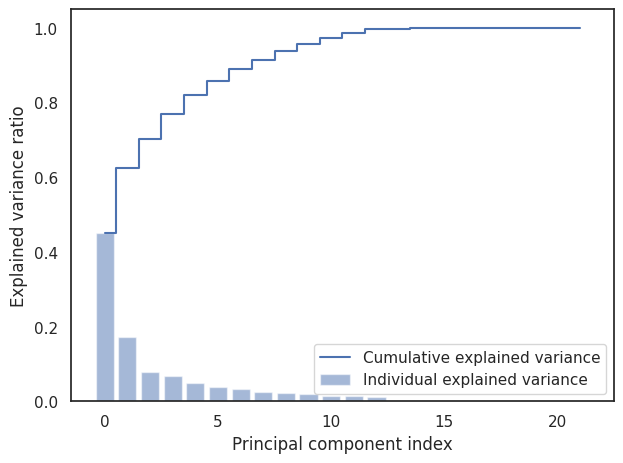

In [1868]:
from sklearn.decomposition import PCA
pca = PCA() # 2D PCA for the plot
reduced_Normal = pd.DataFrame(pca.fit_transform(X_norm))


exp_var_pca = pca.explained_variance_ratio_

cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [1869]:
for i in cum_sum_eigenvalues:
    if i > .9:
        break

pca_Normal = PCA(n_components=i)
reduced_Normal = pd.DataFrame(pca_Normal.fit_transform(X_norm))

### Data Standardization

In [1870]:
from sklearn import preprocessing
x_Standard = totals.values
scaler = preprocessing.StandardScaler()
x_scaled_Standard = scaler.fit_transform(x_Standard)
X_stand = pd.DataFrame(x_scaled_Standard)

#### PCA

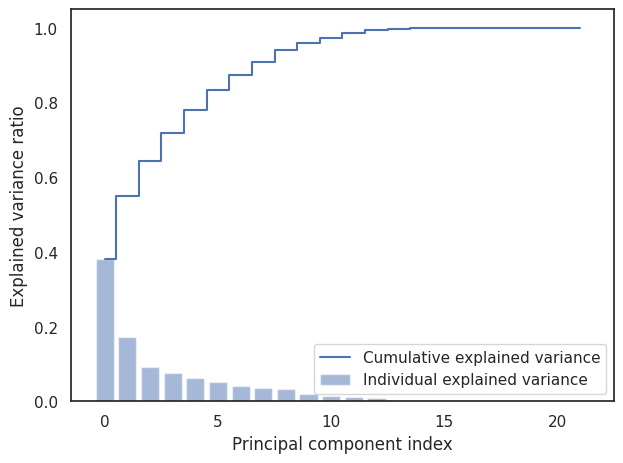

In [1871]:
from sklearn.decomposition import PCA
pca = PCA() # 2D PCA for the plot
reduced_Standard = pd.DataFrame(pca.fit_transform(X_stand))

exp_var_pca = pca.explained_variance_ratio_

cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [1872]:
for i in cum_sum_eigenvalues:
    if i > .9:
        break

pca_stand = PCA(n_components=i)
reduced_Standard = pd.DataFrame(pca_stand.fit_transform(X_stand))

# K-Means Clustering

##Using the Normalized Data

In [1873]:
from sklearn.cluster import KMeans

# specify the number of clusters
kmeans = KMeans(n_clusters=5, random_state=22)

# fit the input data
kmeans = kmeans.fit(reduced_Normal)

# get the cluster labels
labels = kmeans.predict(reduced_Normal)

# cluster values
clusters = kmeans.labels_.tolist()

reduced_Normal['cluster'] = clusters

reduced_Normal['name'] = names
# reduced_Normal.columns = ['x', 'y', 'cluster', 'Fighter']
reduced_Normal.head()

,0,1,2,3,4,5,6,7,8,cluster,name
0,0.193891,-0.190610,-0.098183,-0.023142,-0.123983,-0.069451,-0.032831,0.000129,0.027864,1,AJ Dobson
1,0.179822,0.059559,-0.238773,-0.040034,0.052099,0.185597,-0.217466,-0.043623,0.113553,1,AJ Fletcher
2,-0.316493,-0.199082,0.289872,-0.195477,0.043610,0.078349,-0.034281,0.005309,-0.238892,3,Aaron Phillips
3,0.242839,0.014727,0.253034,0.148480,-0.110205,-0.061786,-0.121099,-0.033083,-0.127216,1,Aaron Riley
4,0.700975,0.069154,0.532660,-0.148292,-0.284690,0.028941,-0.269332,0.018180,-0.324841,2,Aaron Rosa


### Join the cluster a fighter belongs to with the fighter_totals dataframe

In [1874]:
nameAndClusterNormal = reduced_Normal.loc[:, ['name', 'cluster']]
nameAndClusterNormal.columns = ['Fighter', 'cluster']
nameAndClusterNormal.head()

,Fighter,cluster
0,AJ Dobson,1
1,AJ Fletcher,1
2,Aaron Phillips,3
3,Aaron Riley,1
4,Aaron Rosa,2


##Using the Standardized Data

In [1875]:
from sklearn.cluster import KMeans

# specify the number of clusters
kmeans = KMeans(n_clusters=5, random_state=22)

# fit the input data
kmeans = kmeans.fit(reduced_Standard)

# get the cluster labels
labels = kmeans.predict(reduced_Standard)

# cluster values
clusters = kmeans.labels_.tolist()

reduced_Standard['cluster'] = clusters
reduced_Standard['name'] = names
# reduced_Standard.columns = ['x', 'y', 'cluster', 'Fighter']
reduced_Standard.head()

,0,1,2,3,4,5,6,7,8,cluster,name
0,0.970833,-1.557672,-0.451973,-0.238319,-1.111667,0.270510,-0.694831,-0.532459,-0.287856,4,AJ Dobson
1,0.730824,0.037024,-1.775937,0.350606,-0.154892,-2.123420,-1.332813,-0.415416,1.220008,4,AJ Fletcher
2,-1.751406,-0.308883,1.606923,-1.731232,0.702292,-1.080971,0.107612,-1.250259,-1.428821,1,Aaron Phillips
3,2.137314,-0.014730,2.528270,0.680071,-0.558848,0.100501,-0.690171,-0.497670,-0.445047,2,Aaron Riley
4,5.594009,1.350284,4.096510,-2.080623,-1.671620,-1.344695,-1.904718,-1.180597,-1.599720,0,Aaron Rosa


### Join the cluster a fighter belongs to with the fighter_totals dataframe

In [1876]:
nameAndClusterStandard = reduced_Standard.loc[:, ['name', 'cluster']]
nameAndClusterStandard.columns = ['Fighter', 'cluster']
nameAndClusterStandard.head()

,Fighter,cluster
0,AJ Dobson,4
1,AJ Fletcher,4
2,Aaron Phillips,1
3,Aaron Riley,2
4,Aaron Rosa,0


## Compare the Clusters from Normalized Data vs Standardized Data

In [1877]:
pd.merge(nameAndClusterNormal,nameAndClusterStandard, on='Fighter', suffixes=('_N', '_S'))

,Fighter,cluster_N,cluster_S
0,AJ Dobson,1,4
1,AJ Fletcher,1,4
2,Aaron Phillips,3,1
3,Aaron Riley,1,2
4,Aaron Rosa,2,0
...,...,...,...
1845,Zhang Lipeng,0,1
1846,Zhang Tiequan,3,1
1847,Zhang Weili,2,0
1848,Zubaira Tukhugov,1,4


Normalized cluster

In [1878]:
f15normal = pd.merge(fightTot15, nameAndClusterNormal, on='Fighter')
f15normal.head()

,Fighter,KD,SIG_STR_LAND,SIG_STR_ATT,TOTAL_STR_LAND,TOTAL_STR_ATT,TD,TD_ATT,SubAtt,Reversal,...,LEG_LAND,LEG_ATT,STD_STR_LAND,STD_STR_ATT,CLINCH_STR_LAND,CLINCH_STR_ATT,GRD_STR_LAND,GRD_STR_ATT,Fight_Time(min),cluster
0,AJ Dobson,0.0,3.666667,8.366667,4.400000,9.266667,0.100000,0.100000,0.000000,0.000000,...,0.533333,0.533333,3.133333,7.566667,0.433333,0.700000,0.100000,0.100000,30.000000,1
1,AJ Fletcher,0.0,4.033333,8.166667,6.333333,10.833333,0.133333,0.333333,0.066667,0.066667,...,0.500000,0.533333,3.666667,7.566667,0.200000,0.333333,0.166667,0.266667,30.000000,1
2,Aaron Phillips,0.0,1.654068,2.907959,9.230769,11.525122,0.000000,0.026679,0.026679,0.026679,...,0.106714,0.160071,0.746999,1.734104,0.560249,0.666963,0.346821,0.506892,37.483333,3
3,Aaron Riley,0.0,3.292555,9.479203,6.092275,12.478154,0.083887,0.241174,0.010486,0.000000,...,0.786438,1.142957,1.992310,7.486893,1.069556,1.677735,0.230689,0.314575,95.366667,1
4,Aaron Rosa,0.0,4.620770,10.151692,14.247375,20.933489,0.000000,0.035006,0.000000,0.000000,...,0.315053,0.350058,2.800467,7.946324,1.820303,2.205368,0.000000,0.000000,28.566667,2


Standardized cluster

In [1879]:
f15standard = pd.merge(fightTot15, nameAndClusterStandard, on='Fighter')
f15standard.head()

,Fighter,KD,SIG_STR_LAND,SIG_STR_ATT,TOTAL_STR_LAND,TOTAL_STR_ATT,TD,TD_ATT,SubAtt,Reversal,...,LEG_LAND,LEG_ATT,STD_STR_LAND,STD_STR_ATT,CLINCH_STR_LAND,CLINCH_STR_ATT,GRD_STR_LAND,GRD_STR_ATT,Fight_Time(min),cluster
0,AJ Dobson,0.0,3.666667,8.366667,4.400000,9.266667,0.100000,0.100000,0.000000,0.000000,...,0.533333,0.533333,3.133333,7.566667,0.433333,0.700000,0.100000,0.100000,30.000000,4
1,AJ Fletcher,0.0,4.033333,8.166667,6.333333,10.833333,0.133333,0.333333,0.066667,0.066667,...,0.500000,0.533333,3.666667,7.566667,0.200000,0.333333,0.166667,0.266667,30.000000,4
2,Aaron Phillips,0.0,1.654068,2.907959,9.230769,11.525122,0.000000,0.026679,0.026679,0.026679,...,0.106714,0.160071,0.746999,1.734104,0.560249,0.666963,0.346821,0.506892,37.483333,1
3,Aaron Riley,0.0,3.292555,9.479203,6.092275,12.478154,0.083887,0.241174,0.010486,0.000000,...,0.786438,1.142957,1.992310,7.486893,1.069556,1.677735,0.230689,0.314575,95.366667,2
4,Aaron Rosa,0.0,4.620770,10.151692,14.247375,20.933489,0.000000,0.035006,0.000000,0.000000,...,0.315053,0.350058,2.800467,7.946324,1.820303,2.205368,0.000000,0.000000,28.566667,0


In [1880]:
f15normalGrouped = f15normal.groupby('cluster').mean().round(3).reset_index()
f15normalGrouped.insert(0, column='Version', value=['Normal' for x in range(5)])

f15standardGrouped = f15standard.groupby('cluster').mean().round(3).reset_index()
f15standardGrouped.insert(0, column='Version', value=['Standard' for x in range(5)])

pd.concat([f15normalGrouped, f15standardGrouped]).sort_values('SIG_STR_LAND')

,Version,cluster,KD,SIG_STR_LAND,SIG_STR_ATT,TOTAL_STR_LAND,TOTAL_STR_ATT,TD,TD_ATT,SubAtt,...,BODY_ATT,LEG_LAND,LEG_ATT,STD_STR_LAND,STD_STR_ATT,CLINCH_STR_LAND,CLINCH_STR_ATT,GRD_STR_LAND,GRD_STR_ATT,Fight_Time(min)
1,Standard,1,0.011,1.703,4.214,3.502,6.239,0.100,0.298,0.059,...,0.527,0.294,0.383,1.086,3.270,0.294,0.447,0.324,0.497,55.629
3,Normal,3,0.013,1.734,4.372,3.393,6.204,0.050,0.172,0.057,...,0.590,0.320,0.418,1.150,3.473,0.317,0.482,0.267,0.417,47.296
0,Normal,0,0.010,1.982,4.480,4.177,6.999,0.191,0.506,0.057,...,0.546,0.310,0.389,1.102,3.155,0.373,0.557,0.506,0.768,70.321
3,Standard,3,0.021,3.187,6.602,6.106,9.974,0.216,0.479,0.056,...,0.758,0.352,0.427,1.593,4.280,0.467,0.683,1.127,1.639,86.403
4,Standard,4,0.020,3.287,8.121,4.485,9.488,0.064,0.190,0.026,...,0.958,0.629,0.788,2.679,7.214,0.340,0.515,0.268,0.392,82.018
1,Normal,1,0.020,3.344,8.051,4.658,9.535,0.059,0.189,0.026,...,1.035,0.644,0.810,2.600,6.958,0.467,0.685,0.277,0.407,82.466
2,Standard,2,0.017,3.506,7.365,5.747,9.854,0.092,0.281,0.035,...,1.257,0.574,0.715,2.043,5.285,1.031,1.456,0.432,0.625,80.162
4,Normal,4,0.022,3.617,7.496,6.484,10.788,0.181,0.415,0.048,...,0.953,0.438,0.538,1.933,5.091,0.676,0.970,1.008,1.434,92.856
2,Normal,2,0.029,5.281,11.789,6.596,13.287,0.058,0.169,0.019,...,1.658,0.793,0.970,4.295,10.394,0.618,0.867,0.368,0.528,89.420
0,Standard,0,0.030,5.351,11.919,6.665,13.418,0.058,0.167,0.018,...,1.673,0.829,1.016,4.377,10.537,0.594,0.837,0.380,0.546,91.180


## Examine the clusters

Going with the K-means cluster that used Standardized Scaling

In [1881]:
fightTot15 = f15standard.copy()
fightTot15.head()

,Fighter,KD,SIG_STR_LAND,SIG_STR_ATT,TOTAL_STR_LAND,TOTAL_STR_ATT,TD,TD_ATT,SubAtt,Reversal,...,LEG_LAND,LEG_ATT,STD_STR_LAND,STD_STR_ATT,CLINCH_STR_LAND,CLINCH_STR_ATT,GRD_STR_LAND,GRD_STR_ATT,Fight_Time(min),cluster
0,AJ Dobson,0.0,3.666667,8.366667,4.400000,9.266667,0.100000,0.100000,0.000000,0.000000,...,0.533333,0.533333,3.133333,7.566667,0.433333,0.700000,0.100000,0.100000,30.000000,4
1,AJ Fletcher,0.0,4.033333,8.166667,6.333333,10.833333,0.133333,0.333333,0.066667,0.066667,...,0.500000,0.533333,3.666667,7.566667,0.200000,0.333333,0.166667,0.266667,30.000000,4
2,Aaron Phillips,0.0,1.654068,2.907959,9.230769,11.525122,0.000000,0.026679,0.026679,0.026679,...,0.106714,0.160071,0.746999,1.734104,0.560249,0.666963,0.346821,0.506892,37.483333,1
3,Aaron Riley,0.0,3.292555,9.479203,6.092275,12.478154,0.083887,0.241174,0.010486,0.000000,...,0.786438,1.142957,1.992310,7.486893,1.069556,1.677735,0.230689,0.314575,95.366667,2
4,Aaron Rosa,0.0,4.620770,10.151692,14.247375,20.933489,0.000000,0.035006,0.000000,0.000000,...,0.315053,0.350058,2.800467,7.946324,1.820303,2.205368,0.000000,0.000000,28.566667,0


In [1882]:
f15standardGrouped = f15standard.groupby('cluster').mean().round(3).reset_index()
f15standardGrouped

,cluster,KD,SIG_STR_LAND,SIG_STR_ATT,TOTAL_STR_LAND,TOTAL_STR_ATT,TD,TD_ATT,SubAtt,Reversal,...,BODY_ATT,LEG_LAND,LEG_ATT,STD_STR_LAND,STD_STR_ATT,CLINCH_STR_LAND,CLINCH_STR_ATT,GRD_STR_LAND,GRD_STR_ATT,Fight_Time(min)
0,0,0.030,5.351,11.919,6.665,13.418,0.058,0.167,0.018,0.008,...,1.673,0.829,1.016,4.377,10.537,0.594,0.837,0.380,0.546,91.180
1,1,0.011,1.703,4.214,3.502,6.239,0.100,0.298,0.059,0.021,...,0.527,0.294,0.383,1.086,3.270,0.294,0.447,0.324,0.497,55.629
2,2,0.017,3.506,7.365,5.747,9.854,0.092,0.281,0.035,0.011,...,1.257,0.574,0.715,2.043,5.285,1.031,1.456,0.432,0.625,80.162
3,3,0.021,3.187,6.602,6.106,9.974,0.216,0.479,0.056,0.019,...,0.758,0.352,0.427,1.593,4.280,0.467,0.683,1.127,1.639,86.403
4,4,0.020,3.287,8.121,4.485,9.488,0.064,0.190,0.026,0.012,...,0.958,0.629,0.788,2.679,7.214,0.340,0.515,0.268,0.392,82.018


Cluster averages vs the UFC average

In [1883]:
fighter_totalsDescriptiveStats = fighter_totals.describe().round(3).reset_index(drop=False)
fighter_totalsDescriptiveStats = fighter_totalsDescriptiveStats[fighter_totalsDescriptiveStats['index'] == 'mean']

clustersVSufc = pd.concat([f15standardGrouped, fighter_totalsDescriptiveStats]).reset_index(drop=True)
clustersVSufc = clustersVSufc.drop('index', axis=1)
clustersVSufc['cluster'][5] = 'UFC'
clustersVSufc

,cluster,KD,SIG_STR_LAND,SIG_STR_ATT,TOTAL_STR_LAND,TOTAL_STR_ATT,TD,TD_ATT,SubAtt,Reversal,...,BODY_ATT,LEG_LAND,LEG_ATT,STD_STR_LAND,STD_STR_ATT,CLINCH_STR_LAND,CLINCH_STR_ATT,GRD_STR_LAND,GRD_STR_ATT,Fight_Time(min)
0,0.0,0.030,5.351,11.919,6.665,13.418,0.058,0.167,0.018,0.008,...,1.673,0.829,1.016,4.377,10.537,0.594,0.837,0.380,0.546,91.180
1,1.0,0.011,1.703,4.214,3.502,6.239,0.100,0.298,0.059,0.021,...,0.527,0.294,0.383,1.086,3.270,0.294,0.447,0.324,0.497,55.629
2,2.0,0.017,3.506,7.365,5.747,9.854,0.092,0.281,0.035,0.011,...,1.257,0.574,0.715,2.043,5.285,1.031,1.456,0.432,0.625,80.162
3,3.0,0.021,3.187,6.602,6.106,9.974,0.216,0.479,0.056,0.019,...,0.758,0.352,0.427,1.593,4.280,0.467,0.683,1.127,1.639,86.403
4,4.0,0.020,3.287,8.121,4.485,9.488,0.064,0.190,0.026,0.012,...,0.958,0.629,0.788,2.679,7.214,0.340,0.515,0.268,0.392,82.018
5,UFC,0.022,2.978,6.852,4.812,8.918,0.103,0.289,0.050,0.016,...,0.904,0.492,0.627,2.044,5.459,0.484,0.717,0.450,0.676,62.243


# A test to see how well we clustered a fighters offensive stats

In [1884]:
def offensiveSimilarity(df, fighter, startCol: int, endCol: int):
    """
    Fighter: The fighter you want to see who compares to
    startCol: should be an index of the column
    endCol: should be an index of the column
    """
    sim_dict = {}

    fighterIndex = df[df['Fighter'] == fighter].index
    fi = fighterIndex[0]

    for i in range(len(df)):
        simTotal = 0
        if i == fi:
            continue
        for col in range(startCol, endCol+1):
            simTotal += (df.iloc[fi, col] - df.iloc[i, col]) ** 2

        if len(sim_dict) == 0:
            sim_dict = {df.iloc[i,0]:simTotal ** (1/2)}

        sim_dict[df.iloc[i,0]] = simTotal ** (1/2)

    sdf = pd.DataFrame.from_dict(sim_dict, orient='index').reset_index()
    sdf = sdf.rename(columns={'index':'Fighter', 0:'Similarity'})
    sdf = sdf.sort_values('Similarity')
    return sdf.reset_index(drop=True)
        

Grab just the fighters in cluster zero

In [1885]:
o = fightTot15[fightTot15['cluster'] == 0].reset_index(drop=True)
o.head()

,Fighter,KD,SIG_STR_LAND,SIG_STR_ATT,TOTAL_STR_LAND,TOTAL_STR_ATT,TD,TD_ATT,SubAtt,Reversal,...,LEG_LAND,LEG_ATT,STD_STR_LAND,STD_STR_ATT,CLINCH_STR_LAND,CLINCH_STR_ATT,GRD_STR_LAND,GRD_STR_ATT,Fight_Time(min),cluster
0,Aaron Rosa,0.000000,4.620770,10.151692,14.247375,20.933489,0.000000,0.035006,0.0,0.000000,...,0.315053,0.350058,2.800467,7.946324,1.820303,2.205368,0.000000,0.000000,28.566667,0
1,Abner Lloveras,0.000000,6.266667,12.600000,6.600000,12.933333,0.133333,0.666667,0.0,0.000000,...,0.400000,0.400000,5.066667,10.800000,1.200000,1.800000,0.000000,0.000000,15.000000,0
2,Abu Azaitar,0.000000,5.211581,11.592428,9.253898,16.269488,0.033408,0.133630,0.0,0.033408,...,0.634744,0.668151,3.741648,9.688196,1.035635,1.369710,0.434298,0.534521,29.933333,0
3,Adrian Yanez,0.127497,6.553336,16.396090,6.604335,16.447089,0.000000,0.000000,0.0,0.000000,...,0.968976,1.045474,6.221844,15.860603,0.050999,0.076498,0.280493,0.458989,39.216667,0
4,Alan Baudot,0.032120,5.364026,9.154176,6.263383,10.053533,0.000000,0.000000,0.0,0.000000,...,0.481799,0.513919,3.597430,7.194861,1.124197,1.188437,0.642398,0.770878,31.133333,0


Do the similarity for the fighters only in cluster zero

In [1886]:
cluster0SIM = offensiveSimilarity(o, 'Sean O\'Malley', 1, 22)
cluster0SIM.head(10)

,Fighter,Similarity
0,Rhys McKee,1.839058
1,Carlos Ulberg,3.548520
2,Justin Gaethje,3.618496
3,Chase Sherman,3.905636
4,Istela Nunes,4.173104
5,Cheyanne Vlismas,4.310308
6,Syuri Kondo,4.359254
7,Dustin Jacoby,4.503628
8,Jamahal Hill,4.555321
9,Natalia Silva,4.816960


Now do the similarity for all fighters regardless of cluster

In [1887]:
allUFCsimilarity = offensiveSimilarity(fighter_totals, 'Sean O\'Malley', 1, 22).head(10)
allUFCsimilarity.head(10)

,Fighter,Similarity
0,Rhys McKee,1.839058
1,Gokhan Saki,2.407628
2,Mike Malott,3.227652
3,Carlos Ulberg,3.548520
4,Justin Gaethje,3.618496
5,Chase Sherman,3.905636
6,Istela Nunes,4.173104
7,Cheyanne Vlismas,4.310308
8,Syuri Kondo,4.359254
9,Dustin Jacoby,4.503628


7 out of the top 10 for **allUFCsimilarity** also appeared in the top 10 of similarity for **cluster0SIM** (cluster 0). 

In [1888]:
cluster0SIM.merge(allUFCsimilarity, on=['Fighter', 'Similarity'], how='inner')

,Fighter,Similarity
0,Rhys McKee,1.839058
1,Carlos Ulberg,3.548520
2,Justin Gaethje,3.618496
3,Chase Sherman,3.905636
4,Istela Nunes,4.173104
5,Cheyanne Vlismas,4.310308
6,Syuri Kondo,4.359254
7,Dustin Jacoby,4.503628


# Predict which cluster a fighter will belong to

In the beginning i said that we were leaving out fighters with less than 15 minutes of fight time for the K-means classifier. Now were going to try to predict which cluster those fighters belong to with our trained K-means classifier

## Decision Tree

In [1889]:
lessThan15 = fighter_totals[fighter_totals['Fight_Time(min)'] <15]
dataToPredict = lessThan15.drop(['Fighter', 'Fight_Time(min)'], axis=1)
dataToPredict.head()

X = fightTot15.drop(['Fighter', 'Fight_Time(min)', 'cluster'], axis=1)

y = fightTot15['cluster']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100, test_size=30)

In [1890]:
# Create Decision Tree Classifier
from sklearn import tree
from sklearn.metrics import accuracy_score

clf = tree.DecisionTreeClassifier(random_state=100)
clf.fit(X_train, y_train)

# Making Predictions with Our Model
predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))

0.9333333333333333


## KNN

In [1891]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)
print(knn.score(X_test, y_test))
print(accuracy_score(y_test, prediction))

1.0
1.0


## Random Forest

In [1892]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(criterion='entropy', random_state=100)   
rf_clf.fit(X_train,y_train)

y_predict = rf_clf.predict(X_test)

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

print(accuracy_score(y_test,y_predict))

0.9333333333333333


## Prediction

In [1893]:
predicted_cluster = knn.predict(dataToPredict)
lessThan15Predicitons = lessThan15.copy()
lessThan15Predicitons['cluster'] = predicted_cluster
lessThan15Predicitons.head()

,Fighter,KD,SIG_STR_LAND,SIG_STR_ATT,TOTAL_STR_LAND,TOTAL_STR_ATT,TD,TD_ATT,SubAtt,Reversal,...,LEG_LAND,LEG_ATT,STD_STR_LAND,STD_STR_ATT,CLINCH_STR_LAND,CLINCH_STR_ATT,GRD_STR_LAND,GRD_STR_ATT,Fight_Time(min),cluster
2,Aalon Cruz,0.000000,0.648649,4.864865,0.648649,4.864865,0.000000,0.972973,0.000000,0.000000,...,0.000000,1.297297,0.648649,4.864865,0.000000,0.000000,0.000000,0.000000,3.083333,1
3,Aaron Brink,0.000000,0.000000,5.454545,0.000000,5.454545,0.000000,1.090909,0.000000,0.000000,...,0.000000,0.000000,0.000000,3.272727,0.000000,2.181818,0.000000,0.000000,0.916667,1
8,Aaron Wilkinson,0.000000,0.000000,0.487805,0.000000,0.487805,0.487805,0.487805,0.000000,0.487805,...,0.000000,0.000000,0.000000,0.487805,0.000000,0.000000,0.000000,0.000000,2.050000,1
10,Abdul-Kerim Edilov,0.000000,10.221239,16.592920,19.911504,27.876106,0.265487,0.265487,0.132743,0.000000,...,0.265487,0.398230,1.194690,2.920354,0.796460,1.592920,8.230088,12.079646,7.533333,3
15,Abus Magomedov,3.157895,22.105263,22.105263,22.105263,22.105263,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,9.473684,9.473684,6.315789,6.315789,6.315789,6.315789,0.316667,0


In [1894]:
lessThan15Predicitons['cluster'].value_counts()

1    270
3     53
0     47
4     44
2     32
Name: cluster, dtype: int64

In [1895]:
lessThan15PredicitonsGrouped = lessThan15Predicitons.groupby('cluster').mean()
lessThan15PredicitonsGrouped.reset_index(inplace=True)

lessThan15PredicitonsGrouped

,cluster,KD,SIG_STR_LAND,SIG_STR_ATT,TOTAL_STR_LAND,TOTAL_STR_ATT,TD,TD_ATT,SubAtt,Reversal,...,BODY_ATT,LEG_LAND,LEG_ATT,STD_STR_LAND,STD_STR_ATT,CLINCH_STR_LAND,CLINCH_STR_ATT,GRD_STR_LAND,GRD_STR_ATT,Fight_Time(min)
0,0,0.185848,7.249904,15.669038,12.809102,21.597442,0.259921,0.529788,0.161571,0.041856,...,2.191722,0.816293,1.091779,4.435832,10.995958,1.417250,2.237067,1.396822,2.436014,5.458511
1,1,0.011632,1.003564,2.676183,2.492050,4.330843,0.086487,0.344675,0.077234,0.019364,...,0.319086,0.253385,0.371199,0.564254,1.964808,0.260370,0.433418,0.178939,0.277957,5.921975
2,2,0.014189,3.840019,7.057294,6.769001,10.274457,0.181537,0.571763,0.039596,0.021534,...,1.667204,0.732926,0.925792,1.683905,3.979758,1.695603,2.442080,0.460511,0.635457,5.969271
3,3,0.030308,3.102055,5.493935,6.506997,9.356720,0.285192,0.456955,0.141623,0.016615,...,0.588101,0.197069,0.263293,0.758925,1.873691,0.512433,0.717626,1.830697,2.902619,7.601887
4,4,0.032168,3.024342,8.925013,3.600146,9.579121,0.022729,0.146296,0.108592,0.003484,...,0.960363,0.796099,1.145665,2.495818,8.042584,0.342860,0.639310,0.185664,0.243119,7.031061


## Results

In [1896]:
lessThan15PredicitonsGrouped.insert(0, column='New Prediction', value=['YES' for x in range(5)])
f15standardGrouped.insert(0, column='New Prediction', value=['NO' for x in range(5)])
results = pd.concat([lessThan15PredicitonsGrouped, f15standardGrouped]).sort_values('cluster')
results.reset_index(drop=True, inplace=True)
results

,New Prediction,cluster,KD,SIG_STR_LAND,SIG_STR_ATT,TOTAL_STR_LAND,TOTAL_STR_ATT,TD,TD_ATT,SubAtt,...,BODY_ATT,LEG_LAND,LEG_ATT,STD_STR_LAND,STD_STR_ATT,CLINCH_STR_LAND,CLINCH_STR_ATT,GRD_STR_LAND,GRD_STR_ATT,Fight_Time(min)
0,YES,0,0.185848,7.249904,15.669038,12.809102,21.597442,0.259921,0.529788,0.161571,...,2.191722,0.816293,1.091779,4.435832,10.995958,1.417250,2.237067,1.396822,2.436014,5.458511
1,NO,0,0.030000,5.351000,11.919000,6.665000,13.418000,0.058000,0.167000,0.018000,...,1.673000,0.829000,1.016000,4.377000,10.537000,0.594000,0.837000,0.380000,0.546000,91.180000
2,YES,1,0.011632,1.003564,2.676183,2.492050,4.330843,0.086487,0.344675,0.077234,...,0.319086,0.253385,0.371199,0.564254,1.964808,0.260370,0.433418,0.178939,0.277957,5.921975
3,NO,1,0.011000,1.703000,4.214000,3.502000,6.239000,0.100000,0.298000,0.059000,...,0.527000,0.294000,0.383000,1.086000,3.270000,0.294000,0.447000,0.324000,0.497000,55.629000
4,YES,2,0.014189,3.840019,7.057294,6.769001,10.274457,0.181537,0.571763,0.039596,...,1.667204,0.732926,0.925792,1.683905,3.979758,1.695603,2.442080,0.460511,0.635457,5.969271
5,NO,2,0.017000,3.506000,7.365000,5.747000,9.854000,0.092000,0.281000,0.035000,...,1.257000,0.574000,0.715000,2.043000,5.285000,1.031000,1.456000,0.432000,0.625000,80.162000
6,YES,3,0.030308,3.102055,5.493935,6.506997,9.356720,0.285192,0.456955,0.141623,...,0.588101,0.197069,0.263293,0.758925,1.873691,0.512433,0.717626,1.830697,2.902619,7.601887
7,NO,3,0.021000,3.187000,6.602000,6.106000,9.974000,0.216000,0.479000,0.056000,...,0.758000,0.352000,0.427000,1.593000,4.280000,0.467000,0.683000,1.127000,1.639000,86.403000
8,YES,4,0.032168,3.024342,8.925013,3.600146,9.579121,0.022729,0.146296,0.108592,...,0.960363,0.796099,1.145665,2.495818,8.042584,0.342860,0.639310,0.185664,0.243119,7.031061
9,NO,4,0.020000,3.287000,8.121000,4.485000,9.488000,0.064000,0.190000,0.026000,...,0.958000,0.629000,0.788000,2.679000,7.214000,0.340000,0.515000,0.268000,0.392000,82.018000


Results are relatively close. As I mentioned before, some of these fighters will have an extraordinarily high per minute stat becuase they finish someone quickly and havent fought very enough. 

With that being said, the prediction is still good at getting the fighter into the right cluster. 